In [200]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
%matplotlib inline

In [201]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [202]:
titanic= pd.concat([train,test],sort=False)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


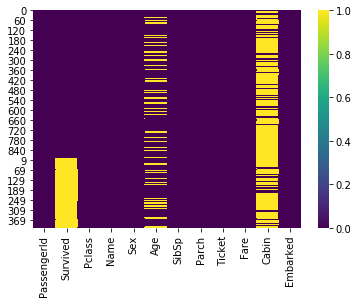

In [203]:
sns.heatmap(titanic.isnull(), cmap='viridis')

In [204]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


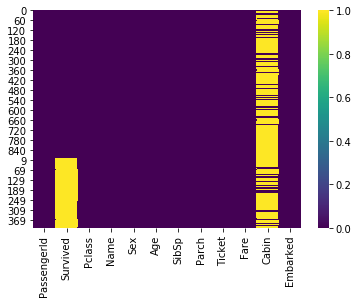

In [205]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare']=titanic['Fare'].fillna(titanic['Fare'].mean())
sns.heatmap(titanic.isnull(), cmap='viridis')

In [206]:
titanic['Cabin']=titanic['Cabin'].fillna('Missing')

In [207]:
titanic['Embarked'].value_counts().idxmax()

'S'

In [208]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax())

In [209]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)

In [210]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [211]:
titanic.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [212]:
titanic = pd.concat([titanic,pclass,sex,embark],axis=1)

In [213]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2,3,male,Q,S
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Missing,0,1,1,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Missing,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Missing,0,1,1,0,1


In [1]:
pclass.info()

NameError: name 'pclass' is not defined

In [22]:
#titanic_num= titanic.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1) #removing variables having characters

In [24]:
#t_train=titanic_num.iloc[:891,]

In [59]:
#s_test=titanic_num.iloc[891:,]

In [215]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [216]:
titanic['Title'] = titanic['Name'].apply(get_title)

In [217]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2,3,male,Q,S,Title
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Missing,0,1,1,0,1,Mr
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,Mrs
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Missing,0,1,0,0,1,Miss
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1,Mrs
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Missing,0,1,1,0,1,Mr


In [218]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [219]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2,3,male,Q,S,Title
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Missing,0,1,1,0,1,Mr
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,Mrs
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Missing,0,1,0,0,1,Miss
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1,Mrs
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Missing,0,1,1,0,1,Mr


In [220]:
def get_cabin(name):
    cabin_search = re.search('([A-Za-z])',name)
    # If the title exists, extract and return it.
    if cabin_search:
        return cabin_search.group(1)
    return ""

In [221]:
titanic['Cabin']=titanic['Cabin'].apply(get_cabin)

In [222]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2,3,male,Q,S,Title
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,0,1,1,0,1,Mr
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,Mrs
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,0,1,0,0,1,Miss
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,0,0,0,0,1,Mrs
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,M,0,1,1,0,1,Mr


In [223]:
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [224]:
titanic['Cabin'] = titanic['Cabin'].replace(['A', 'F','G', 'T'], 'R')

In [226]:
cabin = pd.get_dummies(titanic['Cabin'],drop_first=True)

In [69]:
#titanic.drop(['M'],axis=1,inplace=True)

In [227]:
titanic = pd.concat([titanic,cabin],axis=1)

In [228]:
title = pd.get_dummies(titanic['Title'],drop_first=True)

In [229]:
titanic = pd.concat([titanic,title],axis=1)

In [230]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 27 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Name           1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
2              1309 non-null uint8
3              1309 non-null uint8
male           1309 non-null uint8
Q              1309 non-null uint8
S              1309 non-null uint8
Title          1309 non-null object
C              1309 non-null uint8
D              1309 non-null uint8
E              1309 non-null uint8
M              1309 non-null uint8
R              1309 non-null uint8
Miss           1309 non-null uint8
Mlle           1309 non-null uint8
Mme            1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Ms        

In [231]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2,...,E,M,R,Miss,Mlle,Mme,Mr,Mrs,Ms,Rare
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,0,...,0,1,0,0,0,0,1,0,0,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,0,...,0,1,0,1,0,0,0,0,0,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,M,0,...,0,1,0,0,0,0,1,0,0,0


In [232]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [233]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 26 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Name           1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
2              1309 non-null uint8
3              1309 non-null uint8
male           1309 non-null uint8
Q              1309 non-null uint8
S              1309 non-null uint8
Title          1309 non-null object
C              1309 non-null uint8
D              1309 non-null uint8
E              1309 non-null uint8
M              1309 non-null uint8
R              1309 non-null uint8
Miss           1309 non-null uint8
Mlle           1309 non-null uint8
Mme            1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Ms             1309 non-null uint8
Rare       

In [234]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 26 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Name           1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
2              1309 non-null uint8
3              1309 non-null uint8
male           1309 non-null uint8
Q              1309 non-null uint8
S              1309 non-null uint8
Title          1309 non-null object
C              1309 non-null uint8
D              1309 non-null uint8
E              1309 non-null uint8
M              1309 non-null uint8
R              1309 non-null uint8
Miss           1309 non-null uint8
Mlle           1309 non-null uint8
Mme            1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Ms             1309 non-null uint8
Rare       

In [236]:
titanic.drop(['PassengerId','Ticket','Title','Name'],axis=1,inplace=True)

In [237]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,...,E,M,R,Miss,Mlle,Mme,Mr,Mrs,Ms,Rare
0,0.0,22.0,1,0,7.2500,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1.0,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [238]:
t_train = titanic[titanic['Survived'].notnull()]
t_train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,...,E,M,R,Miss,Mlle,Mme,Mr,Mrs,Ms,Rare
0,0.0,22.0,1,0,7.2500,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1.0,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [239]:
s_test = titanic[titanic['Survived'].isnull()]
s_test.describe()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,...,E,M,R,Miss,Mlle,Mme,Mr,Mrs,Ms,Rare
count,0.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.0,418.0,418.000000,418.000000,418.000000,418.000000
mean,NaN,30.192052,0.447368,0.392344,35.621610,0.222488,0.521531,0.636364,0.110048,0.645933,...,0.021531,0.782297,0.038278,0.186603,0.0,0.0,0.574163,0.172249,0.002392,0.014354
std,NaN,12.635527,0.896760,0.981429,55.840617,0.416416,0.500135,0.481622,0.313324,0.478803,...,0.145320,0.413179,0.192095,0.390059,0.0,0.0,0.495062,0.378049,0.048912,0.119088
min,NaN,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,NaN,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,NaN,29.881138,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000
75%,NaN,35.750000,1.000000,0.000000,31.500000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000
max,NaN,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [240]:
t_train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,...,E,M,R,Miss,Mlle,Mme,Mr,Mrs,Ms,Rare
0,0.0,22.0,1,0,7.2500,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1.0,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [241]:
X = t_train.iloc[:,1:]
X.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S,C,...,E,M,R,Miss,Mlle,Mme,Mr,Mrs,Ms,Rare
0,22.0,1,0,7.2500,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [242]:
Y = t_train['Survived']

In [243]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [244]:
import sklearn.model_selection as model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2, random_state = 200)

In [245]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [246]:
logreg = LogisticRegression()
logreg.fit( X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
logreg.score(X_test,Y_test)

0.7821229050279329

In [248]:
t_predictions = logreg.predict(X_test)
t_predictions

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [249]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [250]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [251]:
clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [252]:
clf.oob_score_

0.8202247191011236

In [253]:
clf.score(X_test,Y_test)

0.776536312849162

In [254]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,Y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\Sreenivas\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Sreenivas\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.8146067415730337
************************
For n_estimators = 30
OOB score is 0.824438202247191
************************
For n_estimators = 50
OOB score is 0.8286516853932584
************************
For n_estimators = 70
OOB score is 0.8384831460674157
************************
For n_estimators = 90
OOB score is 0.8384831460674157
************************
For n_estimators = 110
OOB score is 0.8356741573033708
************************
For n_estimators = 130
OOB score is 0.8342696629213483
************************
For n_estimators = 150
OOB score is 0.8342696629213483
************************
For n_estimators = 170
OOB score is 0.8384831460674157
************************
For n_estimators = 190
OOB score is 0.8398876404494382
************************
For n_estimators = 210
OOB score is 0.8370786516853933
************************
For n_estimators = 230
OOB score is 0.8370786516853933
************************
For n_estimators = 250
OOB score is 0.83707865

In [255]:
#190
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=190,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [256]:
clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=190, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [257]:
clf.oob_score_

0.8398876404494382

In [258]:
clf.score(X_test,Y_test)

0.7877094972067039

In [259]:
print (clf.estimators_[0].feature_importances_)

[0.17202847 0.11739532 0.02260241 0.1870376  0.01967445 0.03020094
 0.01108553 0.01408366 0.00887041 0.01097206 0.         0.
 0.02362747 0.         0.         0.         0.         0.35295169
 0.00567614 0.         0.02379387]


In [260]:
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [261]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [262]:
feature_importance.sort_values(ascending=False)

Mr       0.270555
Fare     0.206567
Age      0.193223
male     0.068628
3        0.067948
SibSp    0.048666
Rare     0.025587
S        0.021134
Parch    0.020170
M        0.018892
E        0.017481
R        0.007279
2        0.006616
C        0.006343
Q        0.006201
Mrs      0.005306
D        0.004973
Miss     0.004431
Ms       0.000000
Mlle     0.000000
Mme      0.000000
dtype: float64

In [263]:
predictions_clf = clf.predict(s_test.iloc[:,1:])

In [265]:
PassengerId = test['PassengerId']
PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [266]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_Bagging.csv", index=False)